# Argentina Stock Market - EDA

Install libraries required to get Finance data

In [1]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=d0c557cfaf5112e86bd3933e2cce7b974943e457df20f9e869827cb6d3edb6a6
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
portfolio = ['MERVAL',
'ALUA',
'BMA',
'BYMA',
'CEPU',
'COME',
'CRES',
'CVH',
'EDN',
'GGAL',
'MIRG',
'PAMP',
'SUPV',
'TECO2',
'TGNO4',
'TGSU2',
'TRAN',
'TXAR',
'VALO',
'YPFD',
'AGRO',
'APBR',
'AUSO',
'BBAR',
'BHIP',
'BOLT',
'BPAT',
'BRIO',
'CADO',
'CAPX',
'CARC',
'CECO2',
'CELU',
'CGPA2',
'CTIO',
'DGCU2',
'DYCA',
'ESME',
'FERR',
'FIPL',
'GAMI',
'GARO',
'GBAN',
'GCLA',
'GRIM',
'HARG',
'HAVA',
'INDU',
'INTR',
'INVJ',
'IRCP',
'IRSA',
'LEDE',
'LOMA',
'LONG',
'METR',
'MOLI',
'MORI',
'OEST',
'PATA',
'PATY',
'PGR',
'POLL',
'RICH',
'RIGO',
'ROSE',
'SAMI',
'SEMI',
'TGLT']

In [3]:
import yfinance as yf
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

df = None

for row in portfolio:
  ticker = row + '.BA' 
  df_ticker = yf.download(ticker, period='10y')
  df_ticker['Ticker'] = ticker
  df_ticker = df_ticker.reset_index()
  df_ticker = df_ticker.set_index(['Date'])

  if isinstance(df, pd.DataFrame) == False:
    df = df_ticker      
  else:      
    df = pd.concat([df_ticker,df])
    df.sort_index()

  
print(df)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MERVAL.BA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%******

In [0]:
df.to_csv('tickers_argentina_2.csv', sep=';', decimal=',')

Import all libraries used in the notebook

In [0]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

This function creates based on list one dataframe that contains all the tickes sorted by Date and Ticker
<br>The period defined to analyze is 10 years

In [0]:
def create_df_portfolio(portfolio):
  
  df = None
  
  for ticker in portfolio:
    df_ticker = yf.download(ticker, period='10y')
    df_ticker['Ticker'] = ticker
    df_ticker = df_ticker.reset_index()
    #df_ticker = df_ticker.set_index(['Date', 'Ticker'])
    df_ticker = df_ticker.set_index(['Date'])

    #Create new rows using simple mean (window for 7, 14 days)
    df_ticker['MA_7'] = df_ticker['Close'].rolling(window=7).mean()
    df_ticker['MA_14'] = df_ticker['Close'].rolling(window=14).mean()
    df_ticker['MA_20'] = df_ticker['Close'].rolling(window=20).mean()
    df_ticker['MA_50'] = df_ticker['Close'].rolling(window=50).mean()
    df_ticker['MA_100'] = df_ticker['Close'].rolling(window=100).mean()

    #Create new adjusted values for Open, High, Low using Adj Close
    df_ticker['Adj_Open'] = df_ticker['Open'] * df_ticker['Adj Close'] / df_ticker['Close']
    df_ticker['Adj_High'] = df_ticker['High'] * df_ticker['Adj Close'] / df_ticker['Close']
    df_ticker['Adj_Low'] = df_ticker['Low'] * df_ticker['Adj Close'] / df_ticker['Close']

    #Create ratio difference using Close and Adj Close to calculate the 
    #change with the current value vs prior element
    df_ticker['Ratio_Close'] = df_ticker.Close.pct_change()
    df_ticker['Ratio_Adj_Close'] = df_ticker['Adj Close'].pct_change()
    

    df_ticker['Returns'] = df_ticker['Close'].pct_change(1)
    df_ticker['Cumulative_Return'] = (1 + df_ticker['Ratio_Close']).cumprod()

    #Create Total Traded estimation
    df_ticker['Total_Traded'] = df_ticker['Open'] * df_ticker['Volume']

    if isinstance(df, pd.DataFrame) == False:
      df = df_ticker      
    else:      
      df = pd.concat([df_ticker,df])
      df.sort_index()

  return df

Defines the portfolio list

In [7]:
portfolio = ['ALUA.BA', 'BMA.BA', 'BYMA.BA', 'CEPU.BA', 'COME.BA', 'CRES.BA', 
             'CVH.BA', 'EDN.BA', 'GGAL.BA', 'MIRG.BA','PAMP.BA','SUPV.BA',
             'TECO2.BA','TGNO4.BA','TGSU2.BA','TRAN.BA','TXAR.BA', 'VALO.BA',
             'YPFD.BA']

df_portfolio = create_df_portfolio(portfolio)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

# Analytics

In [8]:
df_portfolio.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Ticker', 'MA_7',
       'MA_14', 'MA_20', 'MA_50', 'MA_100', 'Adj_Open', 'Adj_High', 'Adj_Low',
       'Ratio_Close', 'Ratio_Adj_Close', 'Returns', 'Cumulative_Return',
       'Total_Traded'],
      dtype='object')

**Understanding the information in Dataframe.<br>**

The information given from Finance API is daily and these are the columns:

*   **Open**: opening price value
*   **High**: highest price value
*   **Low**: lowest price value
*   **Close**: close price value
*   **Adj Close**: closing price after adjustments for splits and dividens distribution
*   **Volume**: number of trades

As part of *Feature Engineer* we created below columns:

*   **MA_7**: Moving average 7 days
*   **MA_14**: Moving average 14 days
*   **MA_20**: Moving average 20 days
*   **MA_50**: Moving average 50 days
*   **MA_100**: Moving average 100 days
*   **Adj_Open**: Calculate opening adjust value
*   **Adj_High**: Calculate high adjust value
*   **Adj_Low**: Calculate low adjust value
*   **Ratio_Close**: Difference between current close value vs previous close
*   **Ratio_Adj_Close**: Difference between current adjust close value vs previous adjust close

In [9]:
df_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40433 entries, 2010-02-08 to 2020-02-07
Data columns (total 20 columns):
Open                 40428 non-null float64
High                 40428 non-null float64
Low                  40428 non-null float64
Close                40428 non-null float64
Adj Close            40428 non-null float64
Volume               40428 non-null float64
Ticker               40433 non-null object
MA_7                 40284 non-null float64
MA_14                40116 non-null float64
MA_20                39972 non-null float64
MA_50                39269 non-null float64
MA_100               38119 non-null float64
Adj_Open             40428 non-null float64
Adj_High             40428 non-null float64
Adj_Low              40428 non-null float64
Ratio_Close          40414 non-null float64
Ratio_Adj_Close      40414 non-null float64
Returns              40414 non-null float64
Cumulative_Return    40414 non-null float64
Total_Traded         40428 non-null flo

Dataframe Data distribution

In [10]:
df_portfolio.describe()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_14,MA_20,MA_50,MA_100,Adj_Open,Adj_High,Adj_Low,Ratio_Close,Ratio_Adj_Close,Returns,Cumulative_Return,Total_Traded
count,40428.000000,40428.000000,40428.000000,40428.000000,4.042800e+04,4.042800e+04,40284.000000,40116.000000,39972.000000,39269.000000,38119.000000,4.042800e+04,4.042800e+04,4.042800e+04,40414.000000,40414.000000,40414.000000,40414.000000,4.042800e+04
mean,61.109505,62.254841,59.828613,61.070750,4.011876e+17,1.209918e+06,60.977689,60.870167,60.770295,60.297961,59.795225,4.011876e+17,4.011972e+17,4.011876e+17,0.023261,0.021718,0.023261,15.148419,8.066682e+07
std,116.770739,118.980994,114.346962,116.710016,5.339988e+18,3.795677e+06,116.312131,115.860162,115.434776,113.503446,111.552677,5.339988e+18,5.339988e+18,5.339988e+18,0.417700,0.449009,0.417700,45.467508,1.040964e+09
min,0.095310,0.096880,0.095310,0.096880,-3.207192e+18,0.000000e+00,0.099889,0.104098,0.138462,0.185091,0.208721,-3.207192e+18,-3.207192e+18,-3.207192e+18,-0.901075,-22.296778,-0.901075,0.331916,0.000000e+00
25%,2.477227,2.511320,2.440000,2.480000,2.080000e+00,4.243925e+04,2.479976,2.479368,2.485661,2.497480,2.480900,2.084621e+00,2.110617e+00,2.050160e+00,-0.013216,-0.013158,-0.013216,1.430554,3.652816e+05
50%,12.974900,13.160300,12.727050,12.974900,1.235000e+01,2.165700e+05,12.957143,13.013757,13.040653,13.112000,13.111000,1.235472e+01,1.258278e+01,1.211525e+01,0.000000,0.000000,0.000000,3.377035,3.949066e+06
75%,51.500000,52.500000,50.162501,51.450001,4.927049e+01,8.485510e+05,51.423214,51.233036,51.352500,51.382000,50.819518,4.929912e+01,5.037564e+01,4.805800e+01,0.015385,0.015438,0.015385,10.506744,1.487058e+07
max,980.000000,990.000000,951.000000,975.000000,6.830285e+19,9.797744e+07,945.642857,894.357143,875.950000,799.458002,737.355002,6.830285e+19,6.830285e+19,6.830285e+19,9.333334,9.333334,9.333334,486.168458,4.573812e+10


In [11]:
df_portfolio.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Ticker', 'MA_7',
       'MA_14', 'MA_20', 'MA_50', 'MA_100', 'Adj_Open', 'Adj_High', 'Adj_Low',
       'Ratio_Close', 'Ratio_Adj_Close', 'Returns', 'Cumulative_Return',
       'Total_Traded'],
      dtype='object')

In [12]:
df_portfolio.shape

(40433, 20)

In [13]:
df_portfolio.index

DatetimeIndex(['2010-02-08', '2010-02-09', '2010-02-10', '2010-02-11',
               '2010-02-12', '2010-02-17', '2010-02-18', '2010-02-19',
               '2010-02-22', '2010-02-23',
               ...
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07'],
              dtype='datetime64[ns]', name='Date', length=40433, freq=None)

Get values for last day in the dataframe


In [14]:
df_portfolio[df_portfolio.index.date==df_portfolio.index.max()]

,Open,High,Low,Close,Adj Close,Volume,Ticker,MA_7,MA_14,MA_20,MA_50,MA_100,Adj_Open,Adj_High,Adj_Low,Ratio_Close,Ratio_Adj_Close,Returns,Cumulative_Return,Total_Traded
Date,,,,,,,,,,,,,,,,,,,,
2020-02-07,830.000000,835.950012,810.000000,818.500000,818.500000,99435.0,YPFD.BA,813.607152,808.978581,821.512506,799.458002,737.355002,830.000000,835.950012,810.000000,-0.012547,-0.012547,-0.012547,5.280645,8.253105e+07
2020-02-07,14.600000,14.800000,14.000000,14.300000,14.300000,559786.0,VALO.BA,14.764286,14.503571,14.635000,13.461000,10.844200,14.600000,14.800000,14.000000,-0.027211,-0.027211,-0.027211,18.633621,8.172876e+06
2020-02-07,13.850000,13.850000,13.850000,13.850000,13.850000,0.0,TXAR.BA,13.850000,13.850000,13.850000,13.850000,13.850000,13.850000,13.850000,13.850000,0.000000,0.000000,0.000000,8.074013,0.000000e+00
2020-02-07,29.000000,29.049999,27.750000,27.850000,27.850000,171824.0,TRAN.BA,28.907143,29.092857,28.600000,25.791000,23.725500,29.000000,29.049999,27.750000,-0.029617,-0.029617,-0.029617,27.038836,4.982896e+06
2020-02-07,107.900002,107.900002,104.050003,104.550003,104.550003,152189.0,TGSU2.BA,105.142858,104.878572,106.000001,101.410000,104.768500,107.900002,107.900002,104.050003,-0.005706,-0.005706,-0.005706,50.735437,1.642119e+07
2020-02-07,38.900002,39.000000,37.150002,37.799999,37.799999,106452.0,TGNO4.BA,39.092857,40.321429,41.435000,39.107000,41.829500,38.900002,39.000000,37.150002,-0.001321,-0.001321,-0.001321,55.588234,4.140983e+06
2020-02-07,200.000000,204.000000,197.199997,201.600006,201.600006,20533.0,TECO2.BA,195.157144,192.932143,190.592500,171.798000,155.934500,200.000000,204.000000,197.199997,0.008000,0.008000,0.008000,15.448276,4.106600e+06
2020-02-07,52.549999,54.599998,52.549999,53.500000,53.500000,154808.0,SUPV.BA,52.778572,52.310714,53.155000,50.305000,46.002000,52.549999,54.599998,52.549999,0.004695,0.004695,0.004695,1.679406,8.135160e+06
2020-02-07,46.900002,47.799999,45.500000,47.000000,47.000000,631757.0,PAMP.BA,46.592857,46.403571,46.710000,45.567000,45.355000,46.900002,47.799999,45.500000,0.001065,0.001065,0.001065,28.658537,2.962940e+07


**Banking portfolio**

We put focus on Banking portfolio in Argentina. For this reason, we redefine the portfolio using only Banking tickers

In [15]:
#portfolio_banking = ['BBAR', 'GGAL.BA', 'BMA.BA', 'SUPV.BA']
portfolio_banking = ['GGAL.BA', 'BMA.BA', 'SUPV.BA']
df_portfolio_banking = create_df_portfolio(portfolio_banking)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Creates a new function to plot the Close value and Moving average in a different period of days to understand the relationship between them

In [0]:
def plot_moving_average(df, ticker, days=500):
  df_ticker = df[df['Ticker']==ticker]  
  plot = df_ticker[['Close', 'MA_7', 'MA_20', 'MA_50', 'MA_100']].iloc[-days:].plot(grid=True, figsize=(10,8))  
  plot.set_title("Ticker: " + ticker)

**Plot last 500 days close values and moving average for each ticker<br>**
We can observe that in the end of August 2019 the stock went down regarding the midterm Presidential elections (PASO)

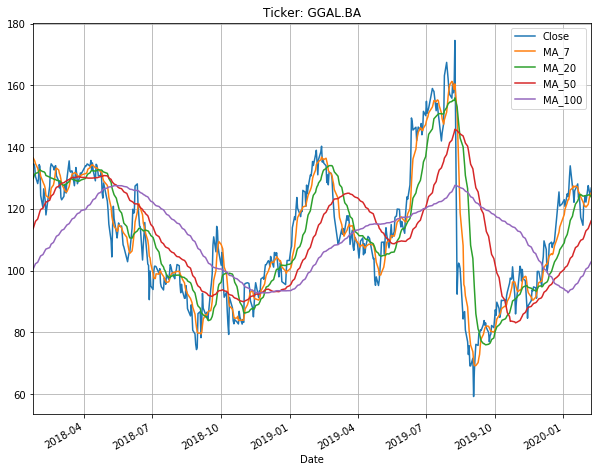

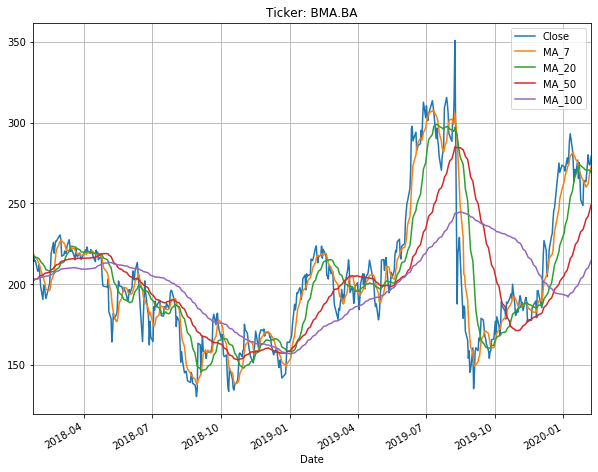

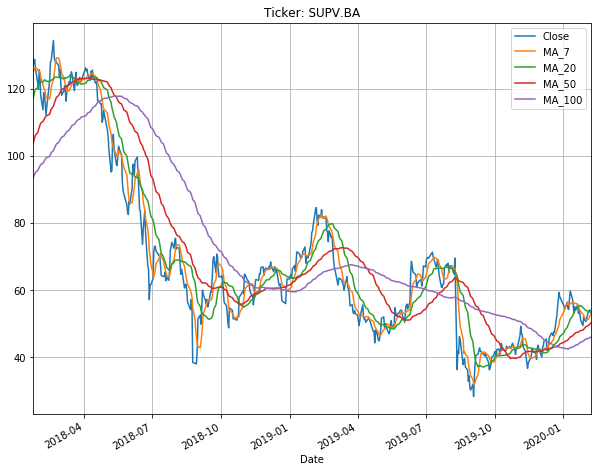

In [17]:
for ticker in portfolio_banking:
  plot_moving_average(df_portfolio_banking, ticker)

**Plot last 120 days close values and moving average for each ticker<br>**
Last 120 days that includes August 2019. After that we can observe that the stocks start raising slowly

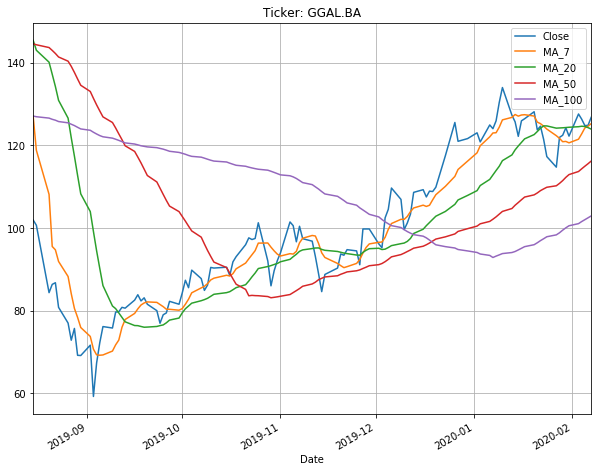

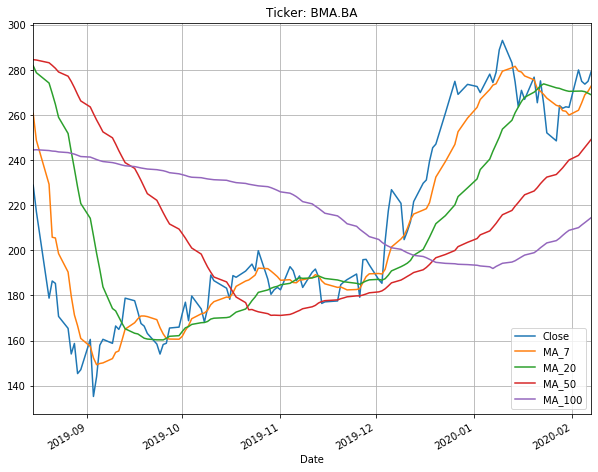

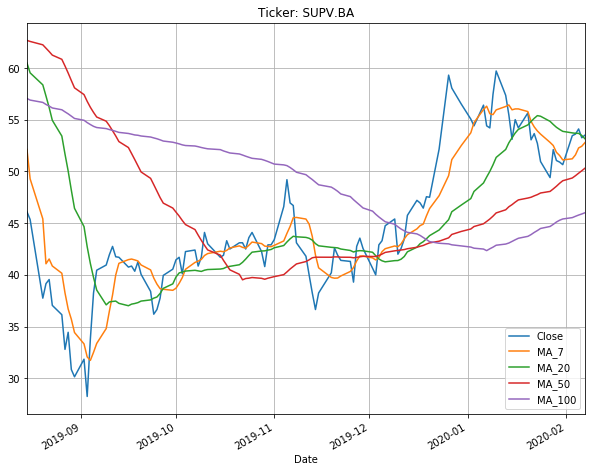

In [18]:
for ticker in portfolio_banking:
  plot_moving_average(df_portfolio_banking, ticker,120)

**Plot last 5 years**<br>
We can see that GGAL.BA and BMA.BA have a similar shape in the last 5 years. <br>From other side, SUPV.BA has a pick in January 2018


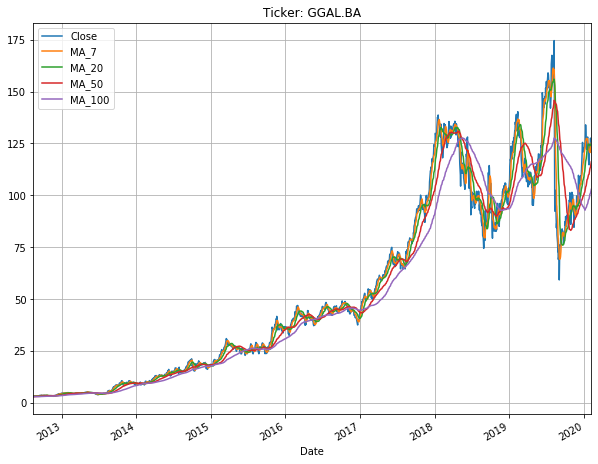

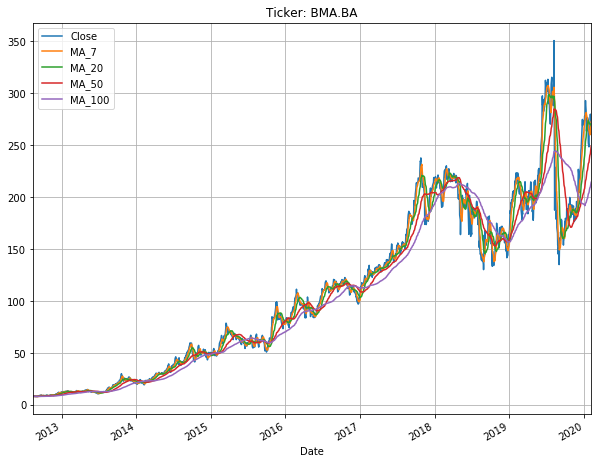

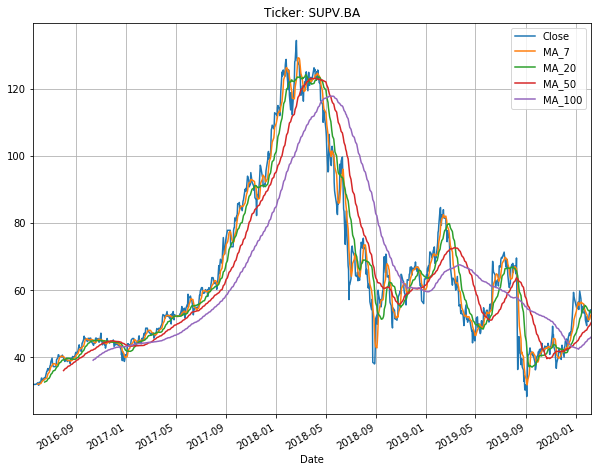

In [19]:
for ticker in portfolio_banking:
  plot_moving_average(df_portfolio_banking, ticker,1825)

Creates a new function to plot by year each Ticker based on: 

Open, Close, Highest, Lowest

In [0]:
def plot_all_in_one(df, value, year=None):
  if year != None:
    df = df[df.index.year==year]
  
  df = df.drop(index=df.index.max())
  df = df.reset_index() 
  plot = df.pivot(index='Date', columns='Ticker', values=value).plot(grid=True, figsize=(10,8))

  if year != None:
    plot.set_title("Year: " + str(year))
  else:
    plot.set_title("History")



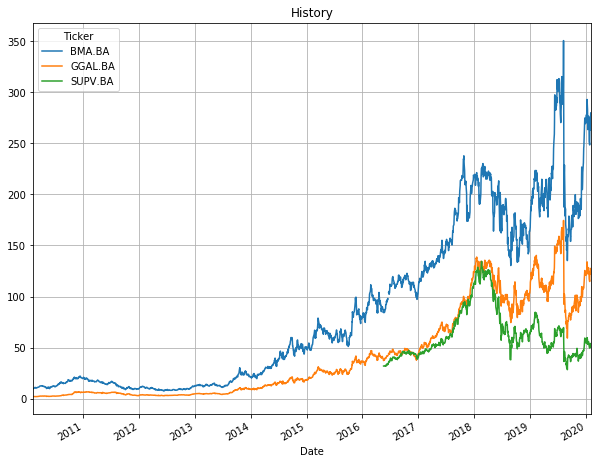

In [21]:
plot_all_in_one(df_portfolio_banking, 'Close')

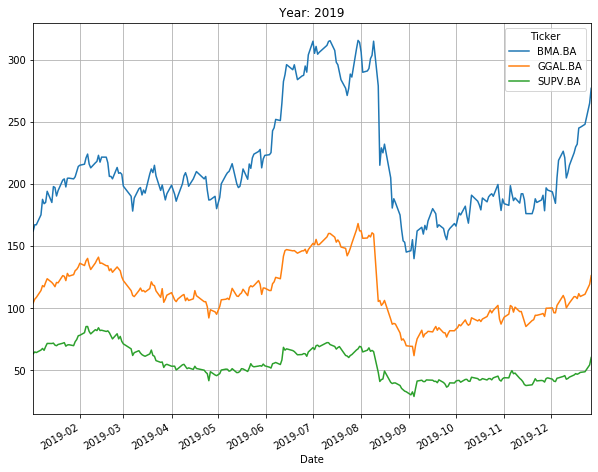

In [22]:
plot_all_in_one(df_portfolio_banking, 'Open', 2019)

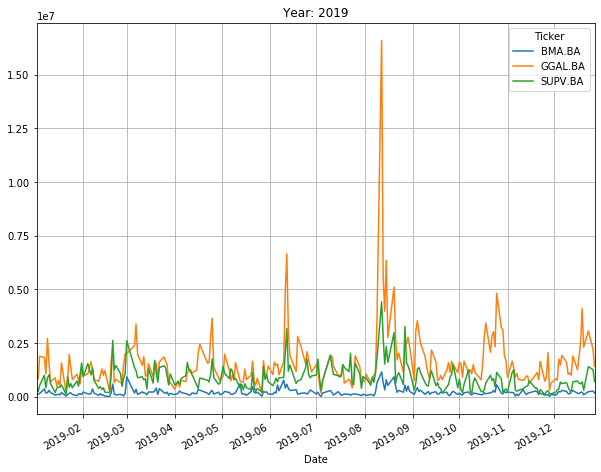

In [23]:
plot_all_in_one(df_portfolio_banking, 'Volume', 2019)

What happen with the volume spike for GGAL between 2019-08 and 2019-09?

Using argmax we can identify the date for this spike: 2019-08-12

https://www.ambito.com/edicion-impresa/mercados/ocho-acciones-se-sumaran-al-indice-msci-argentina-y-6-seran-removidas-n5031421


In [24]:
df_tmp = df_portfolio_banking[df_portfolio_banking['Ticker']=='GGAL.BA']
df_tmp = df_tmp[df_tmp.index.year==2019]

print(df_tmp['Volume'].max())
print(df_tmp['Volume'].argmax())


16590258.0
2019-08-12 00:00:00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """


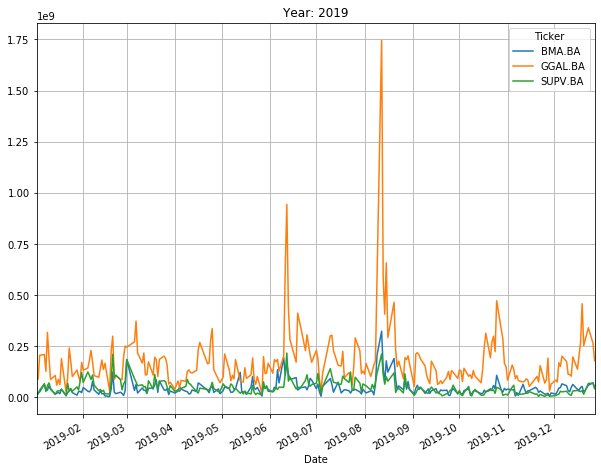

In [25]:
plot_all_in_one(df_portfolio_banking, 'Total_Traded', 2019)

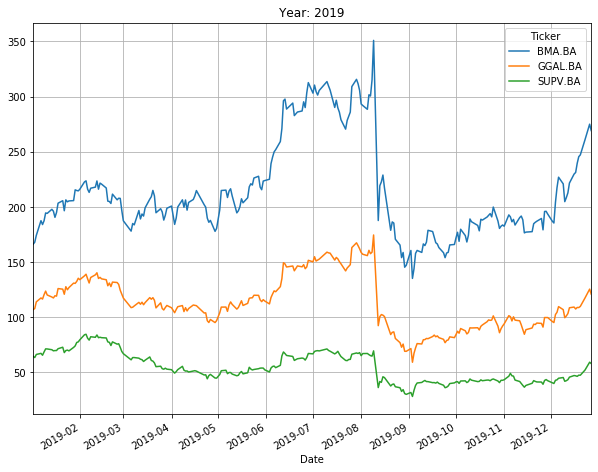

In [26]:
plot_all_in_one(df_portfolio_banking, 'Close', 2019)

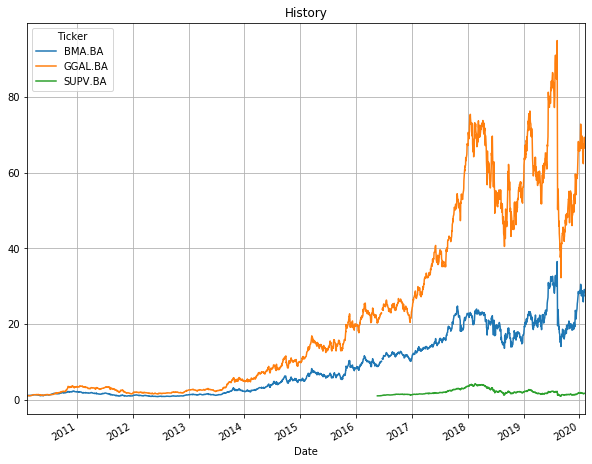

In [27]:
#How much returns?
plot_all_in_one(df_portfolio_banking, 'Cumulative_Return',)

Create a scatterplot using the portfolio to analyze correlation using the Open column.

BMA_BA and GGAL_BA present a good correllation between them.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91a80fd898>,
      dtype=object)

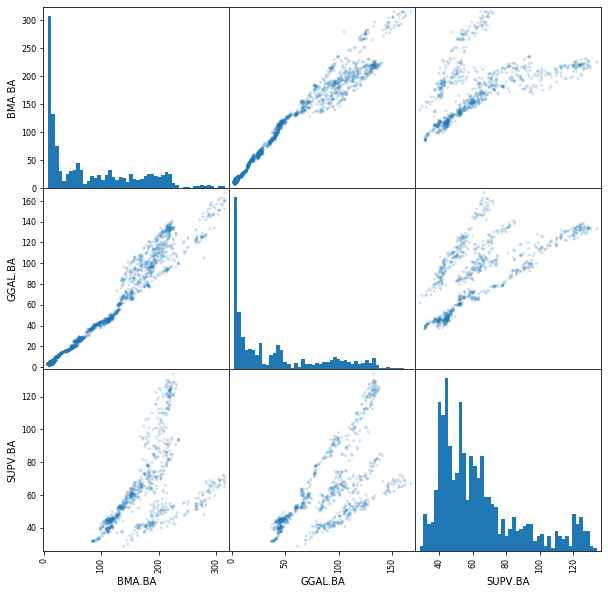

In [28]:
from pandas.plotting import scatter_matrix

df_sc = df_portfolio_banking.reset_index()
df_sc = df_sc.pivot(index='Date', columns='Ticker', values='Open')


scatter_matrix(df_sc, figsize=(10,10), alpha=0.2, hist_kwds={'bins':50})

At the beginning we defined new fields with ratio information. The ratio is calculated based on the difference between current value vs previous. A greater ratio means some noise in the market. 

We can define a function to plot and understand between two tickers the ratio difference

In [0]:
def plot_relation_ratios(df, ticker1, ticker2, ratio, year=None):

  df1 = df[df['Ticker']==ticker1]
  df2 = df[df['Ticker']==ticker2]
  
  if year != None:
    df1 = df1[df1.index.year==year]
    df2 = df2[df2.index.year==year]
  
  df1[ratio].plot(alpha=0.3)
  df2[ratio].plot(alpha=0.2)
  plt.legend()

Validate for 2019 the ratio difference between BMA.BA vs GGAL.BA based on the close value (ratio_close column)

We can see that the ratio for both tickers are really close.

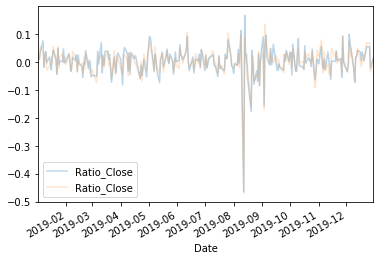

In [30]:
plot_relation_ratios(df_portfolio_banking, 'BMA.BA', 'GGAL.BA', 'Ratio_Close', 2019)

Validate for 2020 the ratio difference between BMA.BA vs GGAL.BA based on the close value (ratio_close column)


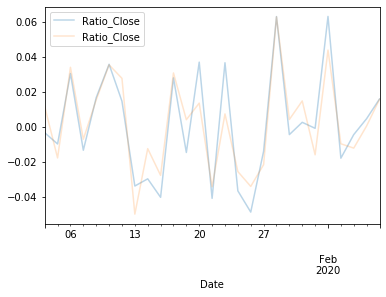

In [31]:
plot_relation_ratios(df_portfolio_banking, 'BMA.BA', 'GGAL.BA', 'Ratio_Close', 2020)

If we do not define a Year value the plot has all historic information from both tickers

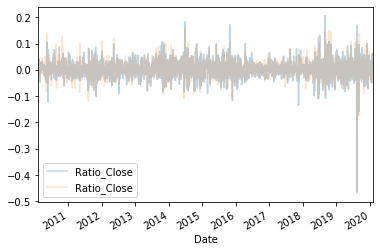

In [32]:
plot_relation_ratios(df_portfolio_banking, 'BMA.BA', 'GGAL.BA', 'Ratio_Close')

Create a Heat Map using historic information to analyze if there is a relationship between them. 

We can see that in August and September there are the most low and high values. 


*   X axis: Month
*   Y axis: Day
*   Value: Ratio Close calculated

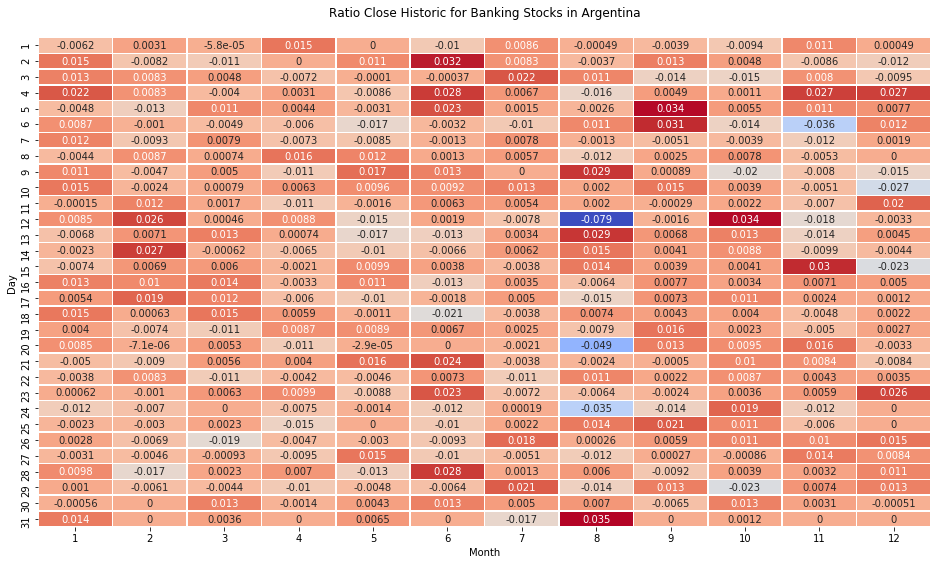

In [33]:
df_heat_map = df_portfolio_banking.copy()
df_heat_map['Month'] = df_portfolio_banking.index.month
df_heat_map['Day'] = df_portfolio_banking.index.day
#df_heat_map['d_weekday'] = df_portfolio_banking.index.weekday
df_heat_map = df_heat_map.pivot_table(values='Ratio_Close', columns='Month', index='Day')
df_heat_map = df_heat_map.fillna(0)

plt.figure(figsize=(16,9))
plt.title("Ratio Close Historic for Banking Stocks in Argentina\n")
sns.heatmap(df_heat_map, annot=True, cmap=plt.cm.coolwarm, cbar = False, linewidths=0.5)
plt.show()

del df_heat_map

Function to generate returns by Year

In [0]:
def ticker_performance_by_year(df, ticker):
  df = df[df['Ticker']==ticker]
  data_group = (df['Ratio_Adj_Close'] * 100).groupby(df.index.year).sum()
  data_group.plot(kind='bar', title='Ticker: ' + ticker, grid=True)
  plt.xlabel('Year')
  plt.show()

Below we can check the performance by Year for each Ticker

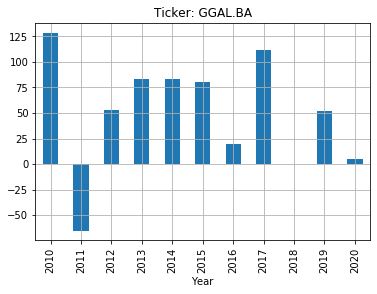

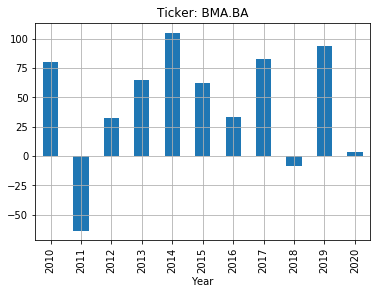

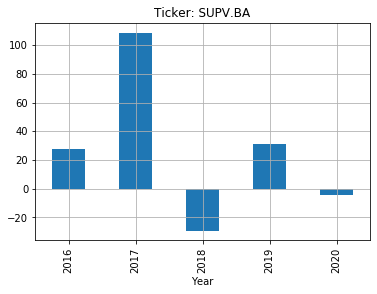

In [35]:
for ticker in portfolio_banking:
  ticker_performance_by_year(df_portfolio_banking, ticker)

Now we can analyze the RETURNS by week of day (Monday, Tuesday, Wednesday, Thursday, Friday) for each Ticker

Wednesday, Thursday and Friday are the better days to get returns.


In [0]:
def ticker_performance_by_weekday(df, ticker):
  df = df[df['Ticker']==ticker]
  data_group = (df['Ratio_Adj_Close'] * 100).groupby(df.index.dayofweek).sum()
  data_group.plot(kind='bar', title='Ticker: ' + ticker, grid=True)
  plt.xlabel('Day (0: Mon, 1: Tue, 2: Wed, 3: Thu, 4: Fri)')
  plt.show()

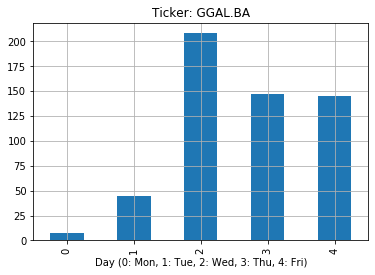

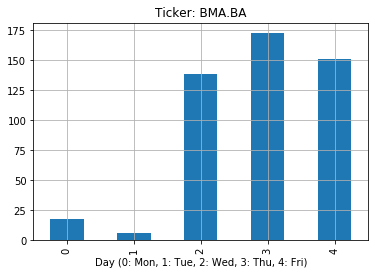

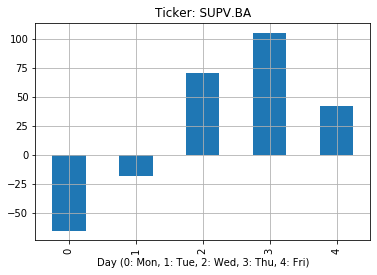

In [37]:
for ticker in portfolio_banking:
  ticker_performance_by_weekday(df_portfolio_banking, ticker)

**How about volatility?**

We can generate the next distribution to understand how volatility is each ticker. 

In our portfolio, we can see that GGAL.BA is centered in zero and has a large peak which indicates that is not volatile.

From other side, BMA.BA and SUPV.BA are more widht that indicates that is more frequent to change the price, but not so much.

In [0]:
def ticker_volatibility(df, ticker, type_report=None):
  df = df[df['Ticker']==ticker]

  if type_report == None:
    df['Ratio_Adj_Close'].hist(bins=100, alpha=0.4, figsize=(8,8), label=ticker)  
  else:
    df['Ratio_Adj_Close'].plot(kind='kde', figsize=(8,8), label=ticker)  

  plt.legend()

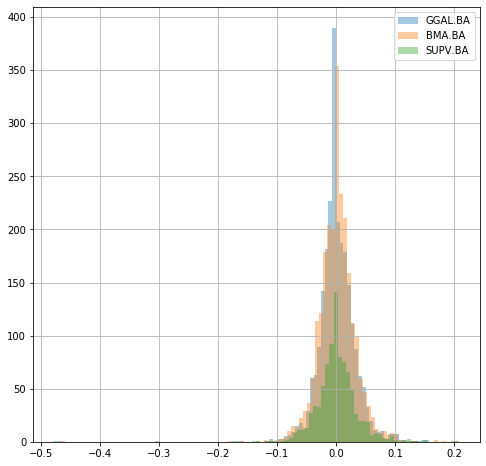

In [39]:
for ticker in portfolio_banking:
  ticker_volatibility(df_portfolio_banking, ticker)

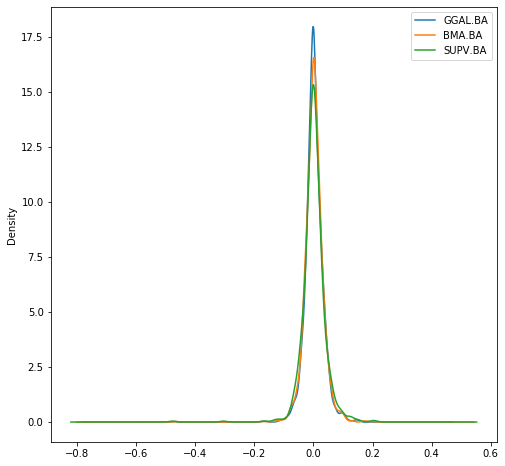

In [40]:
for ticker in portfolio_banking:
  ticker_volatibility(df_portfolio_banking, ticker, True)



Finally we can analyze the distribution for each ticker. Box plot have a lot of outliers related to the volatility that Banking Stocks market present in Argentina. From other side, there is a close relationship in the dispersion for each ticker.

In [0]:
def box_plot_portfolio(df):
  df = df_portfolio_banking.reset_index()
  df = df.pivot(index='Date', columns='Ticker', values='Ratio_Adj_Close')
  df.plot(kind='box', figsize=(8,11), colormap= 'jet')

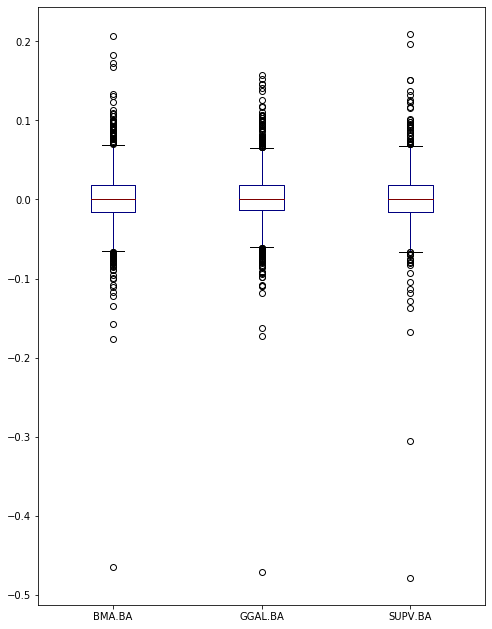

In [42]:
box_plot_portfolio(df_portfolio_banking)